In [3]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Time series and ARIMA modeling
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.api import tsa
#from pmdarima import auto_arima

# Prophet for forecasting
from prophet import Prophet

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.preprocessing import MinMaxScaler

# Deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

c:\Users\Gautam\OneDrive\Desktop\vs\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [4]:
merged_data = pd.read_csv("Merged_dominos.csv")
merged_data

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Items_Qty_In_Grams,day_of_week,month,week,year,holiday,promotion
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",hawaiian_m,25.0,3,1,1,2015,1,0
1,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",hawaiian_m,30.0,3,1,1,2015,1,0
2,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",hawaiian_m,20.0,3,1,1,2015,1,0
3,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",classic_dlx_m,40.0,3,1,1,2015,1,0
4,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",classic_dlx_m,10.0,3,1,1,2015,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187367,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",mexicana_l,60.0,3,12,53,2015,0,0
187368,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",mexicana_l,100.0,3,12,53,2015,0,0
187369,48620,21350,bbq_ckn_s,1,2015-12-31,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,20.0,3,12,53,2015,0,0
187370,48620,21350,bbq_ckn_s,1,2015-12-31,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,5.0,3,12,53,2015,0,0


In [5]:
# # Prepareing the Data for Time Series Forecasting
# # Converting order_date to datetime format
merged_data['order_date'] = pd.to_datetime(merged_data['order_date'])

merged_data = merged_data.set_index('order_date').sort_index()

daily_sales = merged_data['total_price'].resample('D').sum()

print(merged_data.shape)

# Merged Sales and Ingredients DataFrames and Preprocessed the data to create a comprehensive pizza sales dataset
pizza_sales = merged_data

(187372, 18)


In [6]:
# Step 1: Filter the pizza_sales dataset for any week(week 7):
week_7_sales = merged_data[merged_data['week'] == 7]

# Step 2: Group by pizza name and sum the quantities
grouped_sales = week_7_sales.groupby('pizza_name')['quantity'].sum().reset_index()

# Step 3: List all grouped pizza names and their total quantities
print(f"Pizzas sold in week 7:")
for _, row in grouped_sales.iterrows():
    print(f"{row['pizza_name']}: {row['quantity']} pizzas")

# Step 4: Calculate and print the total quantity sold in week 7
total_quantity_sold = week_7_sales['quantity'].sum()
print(f"\nTotal units of pizza sold in week 7: {total_quantity_sold} pizzas")

Pizzas sold in week 7:
bbq_ckn_l: 135 pizzas
bbq_ckn_m: 90 pizzas
bbq_ckn_s: 27 pizzas
big_meat_s: 99 pizzas
brie_carre_s: 48 pizzas
calabrese_l: 20 pizzas
calabrese_m: 52 pizzas
cali_ckn_l: 90 pizzas
cali_ckn_m: 70 pizzas
cali_ckn_s: 52 pizzas
ckn_alfredo_l: 20 pizzas
ckn_alfredo_m: 60 pizzas
ckn_alfredo_s: 12 pizzas
ckn_pesto_l: 52 pizzas
ckn_pesto_m: 12 pizzas
ckn_pesto_s: 12 pizzas
classic_dlx_l: 27 pizzas
classic_dlx_m: 60 pizzas
classic_dlx_s: 30 pizzas
five_cheese_l: 60 pizzas
four_cheese_l: 170 pizzas
four_cheese_m: 44 pizzas
green_garden_l: 5 pizzas
green_garden_m: 36 pizzas
green_garden_s: 64 pizzas
hawaiian_l: 45 pizzas
hawaiian_m: 24 pizzas
hawaiian_s: 66 pizzas
ital_cpcllo_l: 32 pizzas
ital_cpcllo_m: 48 pizzas
ital_cpcllo_s: 28 pizzas
ital_supr_l: 36 pizzas
ital_supr_m: 84 pizzas
ital_supr_s: 24 pizzas
ital_veggie_l: 20 pizzas
ital_veggie_m: 56 pizzas
ital_veggie_s: 27 pizzas
mediterraneo_l: 25 pizzas
mediterraneo_m: 20 pizzas
mediterraneo_s: 8 pizzas
mexicana_l: 76 pizzas

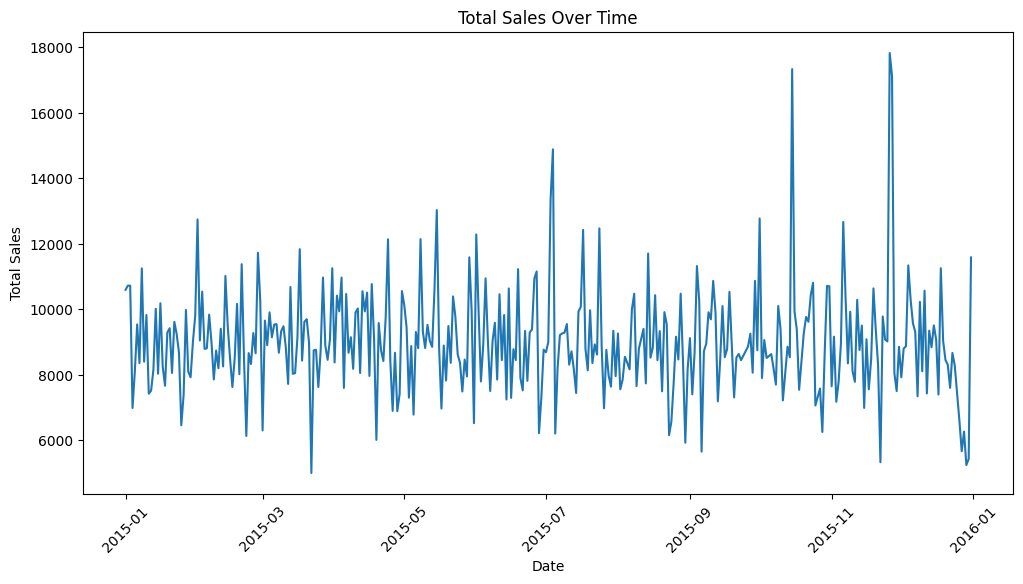

In [7]:
#EDA - Visualization
# Analyzing Sales Trends Over Time

# Ploting sales over time
sales_over_time = merged_data.groupby('order_date')['total_price'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=sales_over_time, x='order_date', y='total_price')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

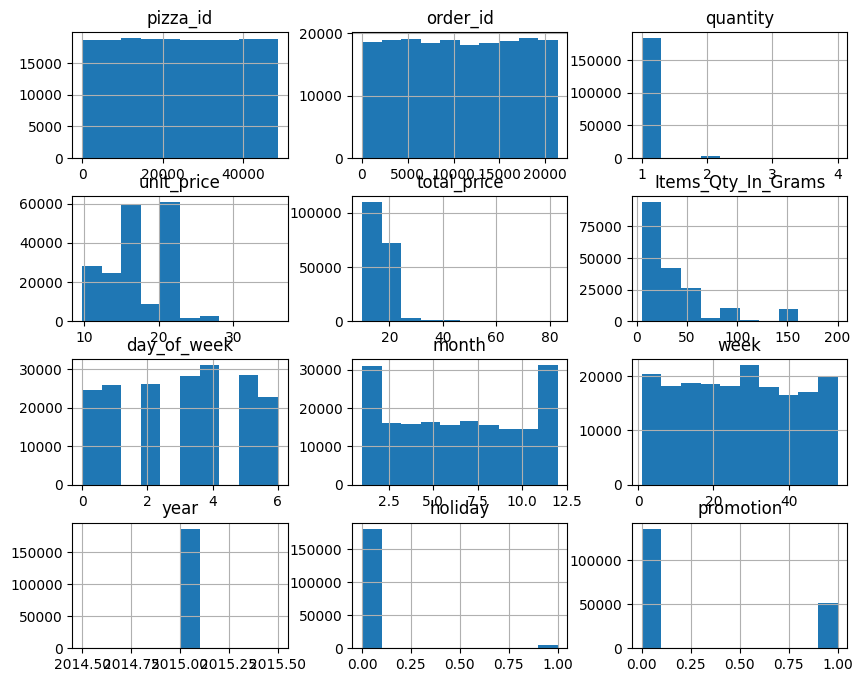

In [8]:
merged_data.hist(figsize=(10,8))
plt.show()

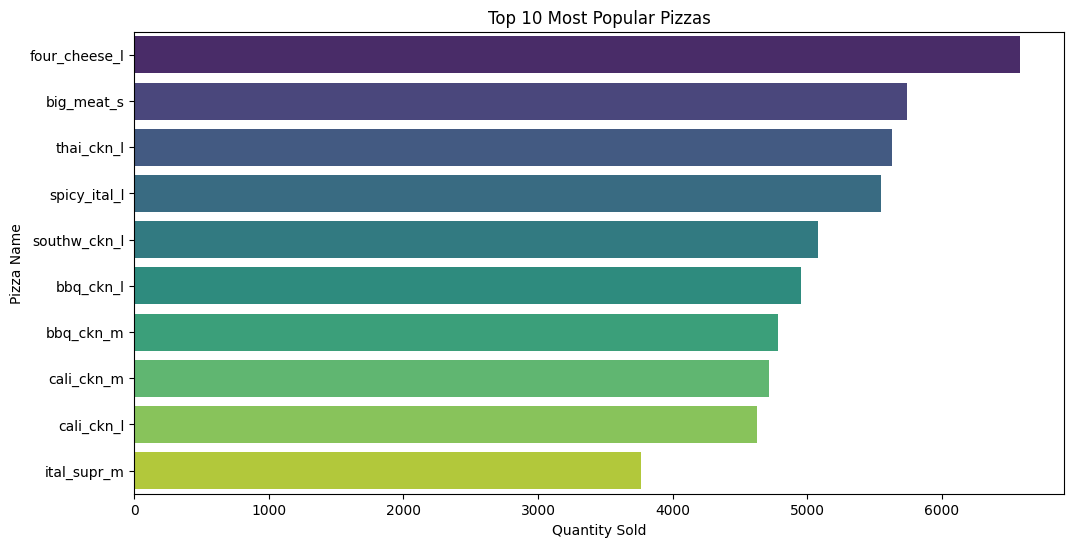

In [9]:
# Aggregate sales by pizza name
pizza_sales = merged_data.groupby('pizza_name')['quantity'].sum().reset_index()

# Sorting by quantity sold
pizza_sales = pizza_sales.sort_values(by='quantity', ascending=False)

# Ploting top 10 most popular pizzas
plt.figure(figsize=(12,6))
sns.barplot(data=pizza_sales.head(10), x='quantity', y='pizza_name', palette='viridis')
plt.title('Top 10 Most Popular Pizzas')
plt.xlabel('Quantity Sold')
plt.ylabel('Pizza Name')
plt.show()

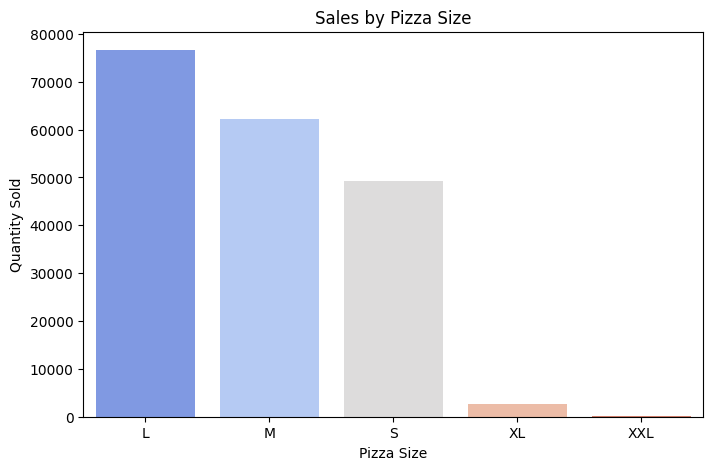

In [10]:
# Ploting pizza size distribution
size_sales = merged_data.groupby('pizza_size')['quantity'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=size_sales, x='pizza_size', y='quantity', palette='coolwarm')
plt.title('Sales by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Quantity Sold')
plt.show()

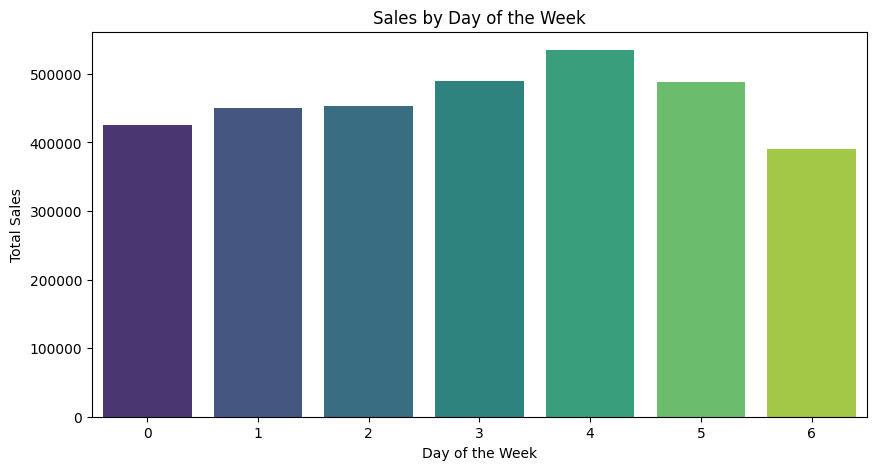

In [11]:
# Aggregate sales by day of the week
sales_by_day = merged_data.groupby('day_of_week')['total_price'].sum().reset_index()

# Order days of the week
#days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_order = [0, 1, 2, 3, 4, 5, 6]
sales_by_day['day_of_week'] = pd.Categorical(sales_by_day['day_of_week'], categories=days_order, ordered=True)

# Plot sales by day of the week
plt.figure(figsize=(10,5))
sns.barplot(data=sales_by_day, x='day_of_week', y='total_price', palette='viridis')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

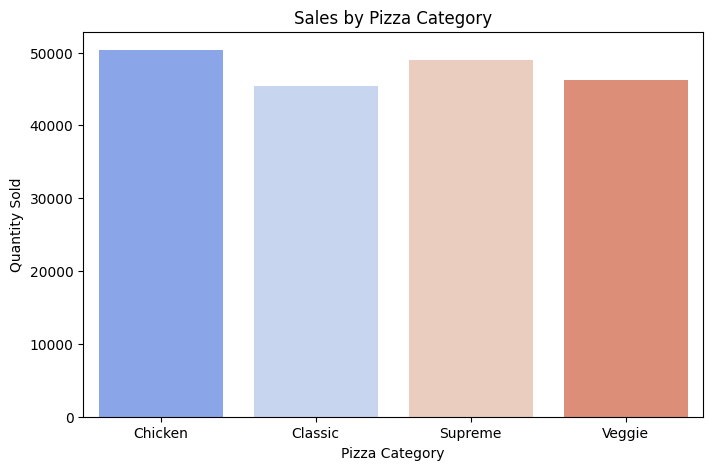

In [12]:
# Ploting pizza category distribution
category_sales = merged_data.groupby('pizza_category')['quantity'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=category_sales, x='pizza_category', y='quantity', palette='coolwarm')
plt.title('Sales by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Quantity Sold')
plt.show()

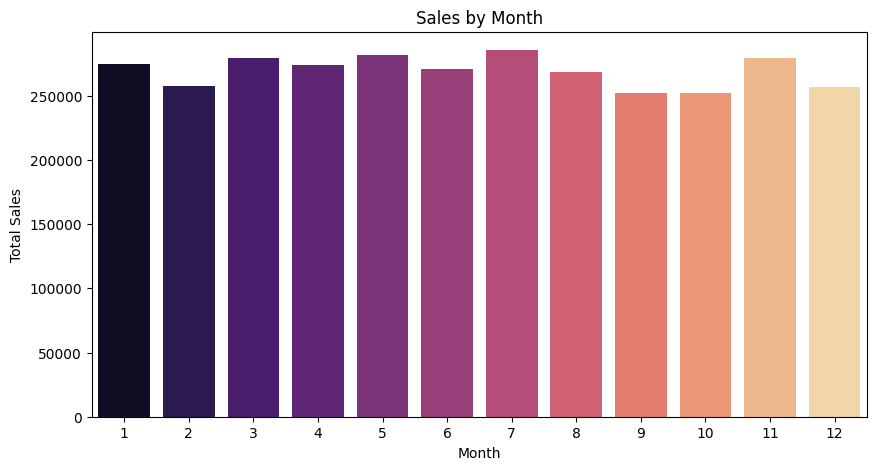

In [13]:
# Aggregate sales by month
sales_by_month = merged_data.groupby('month')['total_price'].sum().reset_index()

# Plot sales by month
plt.figure(figsize=(10,5))
sns.barplot(data=sales_by_month, x='month', y='total_price', palette='magma')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

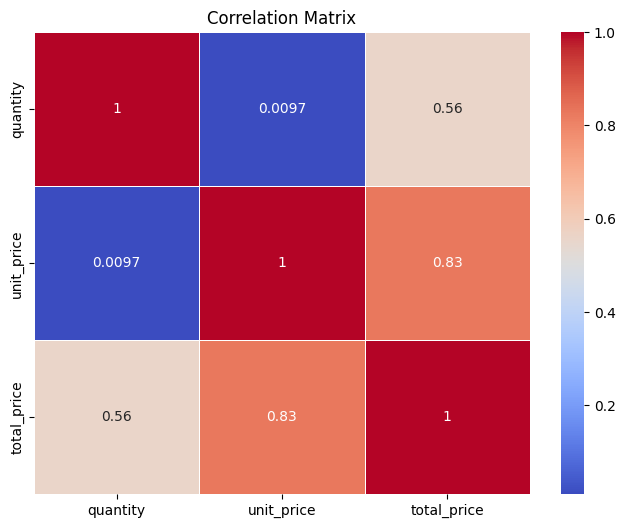

In [14]:
# Correlation matrix
corr_matrix = merged_data[['quantity', 'unit_price', 'total_price']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

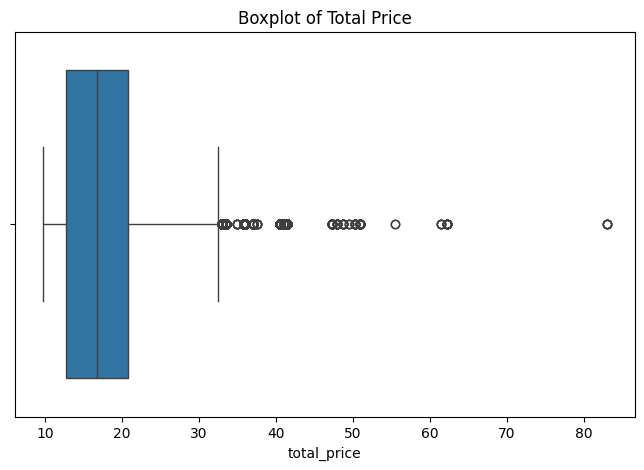

In [15]:
# Boxplot for total_price
plt.figure(figsize=(8,5))
sns.boxplot(data=merged_data, x='total_price')
plt.title('Boxplot of Total Price')
plt.show()

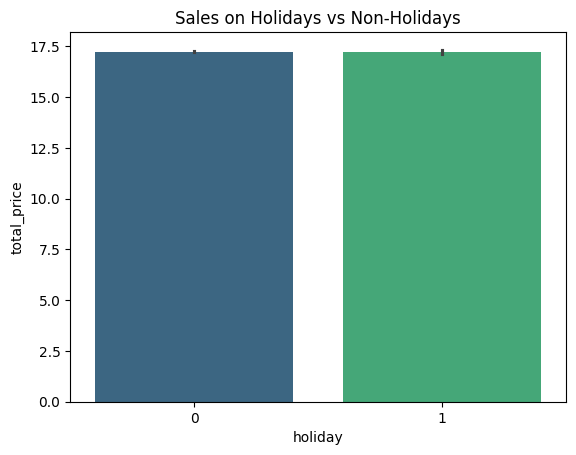

In [16]:
sns.barplot(x='holiday', y='total_price', data=merged_data, palette='viridis')
plt.title('Sales on Holidays vs Non-Holidays')
plt.show()

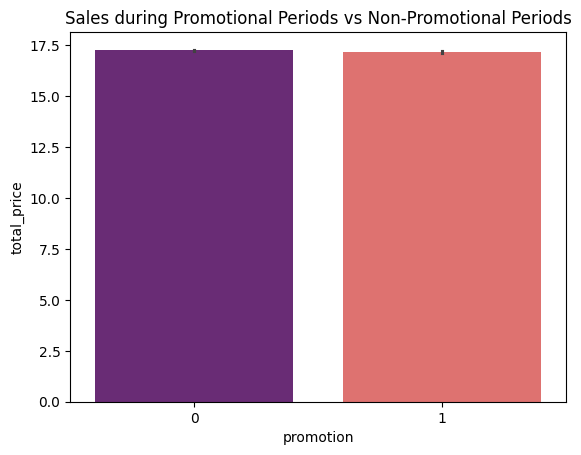

In [17]:
sns.barplot(x='promotion', y='total_price', data=merged_data, palette='magma')
plt.title('Sales during Promotional Periods vs Non-Promotional Periods')
plt.show()

In [18]:
pip install pmdarima

In [19]:
import itertools

Best ARIMA Model MAPE: 0.1896, Best Parameters: (3, 0, 3)
Predictions:
order_date
2015-10-19    3364.581554
2015-10-26    3535.809839
2015-11-02    3481.099177
2015-11-09    3601.492907
2015-11-16    3529.898961
2015-11-23    3637.974685
2015-11-30    3557.251453
2015-12-07    3658.408830
2015-12-14    3572.590704
2015-12-21    3669.849803
2015-12-28    3581.197583
Name: predicted_mean, dtype: float64


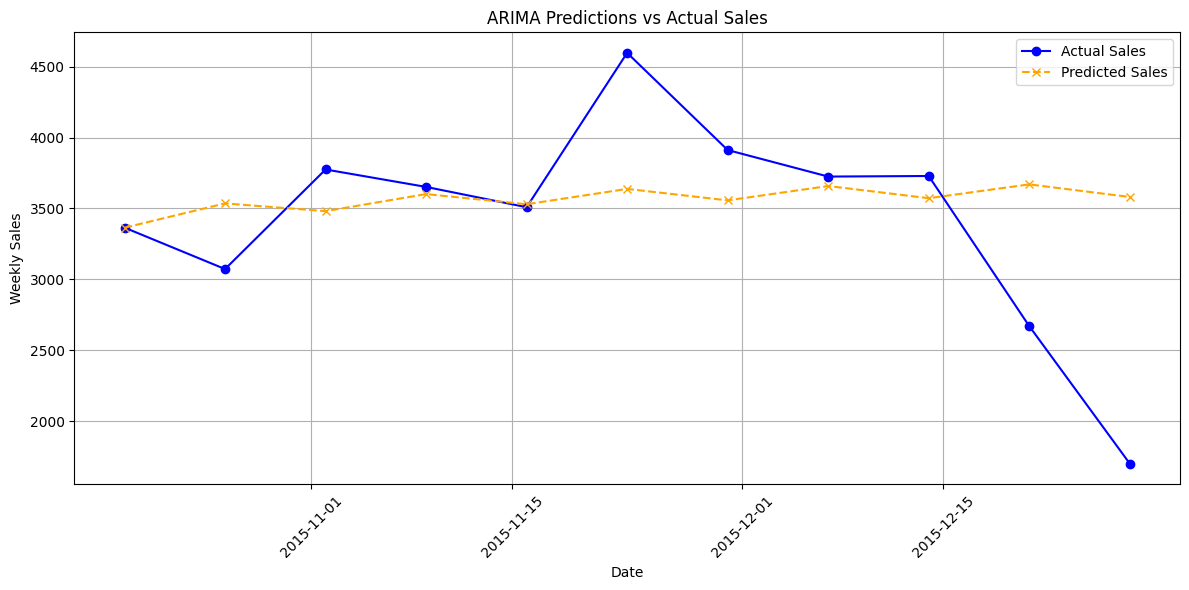

In [20]:
#ARIMA Model

pizza_sales = pd.read_csv("Merged_dominos.csv")

# Ensure 'order_date' column exists and is in datetime format
if 'order_date' not in pizza_sales.columns:
    raise KeyError("'order_date' column is missing from the dataset.")

pizza_sales['order_date'] = pd.to_datetime(pizza_sales['order_date'], errors='coerce')

# Drop rows where 'order_date' or 'quantity' is invalid
pizza_sales = pizza_sales.dropna(subset=['order_date', 'quantity'])

# Ensure 'quantity' is numeric
pizza_sales['quantity'] = pd.to_numeric(pizza_sales['quantity'], errors='coerce')
pizza_sales = pizza_sales.dropna(subset=['quantity'])

# Pizza sales by week
def prepare_weekly_sales(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    weekly_sales = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum()
    return weekly_sales

pizza_sales_weekly = prepare_weekly_sales(pizza_sales)

# train test split
train_size = int(0.8 * len(pizza_sales_weekly))
train, test = pizza_sales_weekly[:train_size], pizza_sales_weekly[train_size:]

# MAPE
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# ARIMA Model Tuneing
def tune_arima_model(train, test, p_values, d_values, q_values):
    best_score, best_params, best_predictions = float("inf"), None, None

    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            model = ARIMA(train, order=(p, d, q)).fit()
            predictions = model.forecast(steps=len(test))
            arima_mape = mape(test, predictions)
            if arima_mape < best_score:
                best_score, best_params, best_predictions = arima_mape, (p, d, q), predictions
        except:
            continue

    print(f"Best ARIMA Model MAPE: {best_score:.4f}, Best Parameters: {best_params}")
    return best_predictions, best_score, best_params

p_values, d_values, q_values = range(0, 6), range(0, 2), range(0, 6)
arima_predictions, arima_mape_score, best_params = tune_arima_model(train, test, p_values, d_values, q_values)

# Formating the predictions for display
arima_predictions = pd.Series(arima_predictions, index=test.index)

print("Predictions:")
print(arima_predictions)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual Sales', color='blue', marker='o')
plt.plot(arima_predictions.index, arima_predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('ARIMA Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Best SARIMA Model MAPE: 0.1849
Predictions:
order_date
2015-10-19    3251.125557
2015-10-26    3647.292299
2015-11-02    3407.561494
2015-11-09    2750.099028
2015-11-16    3590.353370
2015-11-23    3084.831400
2015-11-30    3327.425516
2015-12-07    3155.896951
2015-12-14    3475.639804
2015-12-21    3266.273819
2015-12-28    2592.941794
Name: predicted_mean, dtype: float64


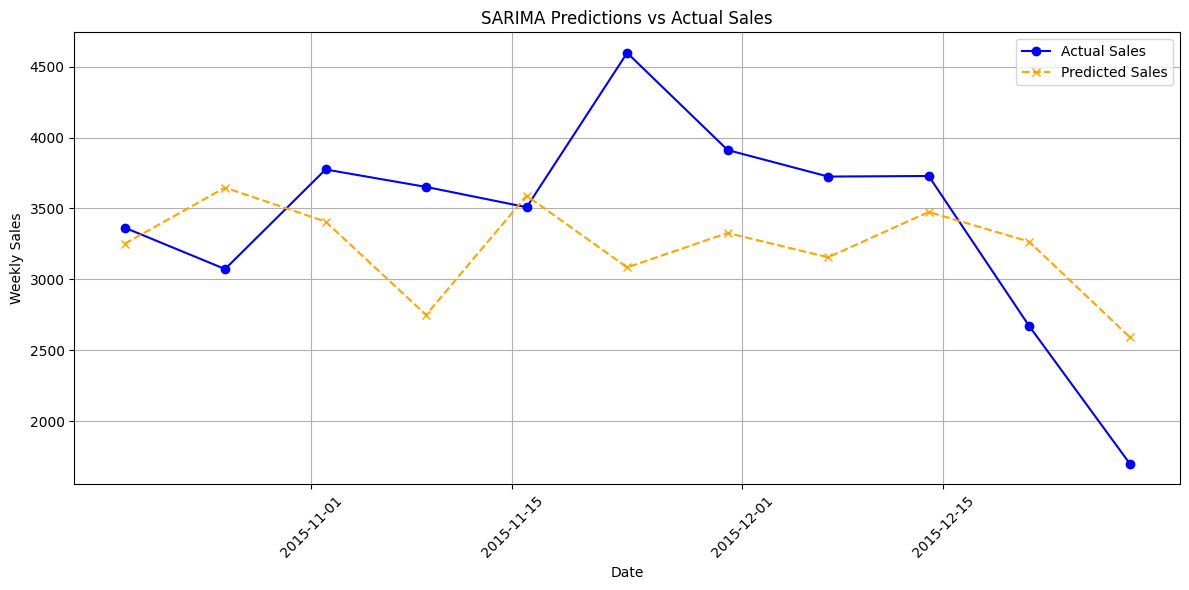

In [21]:
#SARIMA
# P (Seasonal AutoRegressive term): The number of past seasonal values used for prediction.
#D (Seasonal Differencing term): The number of seasonal differencing applied to make data stationary.
#Q (Seasonal Moving Average term): The number of past seasonal forecast errors used for prediction.
#S (Seasonal Period): The length of the seasonal cycle (e.g., 12 for yearly seasonality in monthly data)
# Pizza sales by week
def prepare_weekly_sales(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    weekly_sales = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum()
    return weekly_sales

pizza_sales_weekly = prepare_weekly_sales(pizza_sales)

# train test split
train_size = int(0.8 * len(pizza_sales_weekly))
train, test = pizza_sales_weekly[:train_size], pizza_sales_weekly[train_size:]

# MAPE
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Best SARIMA Model Training and Output
def best_sarima_model(train, test):
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)).fit(disp=False)
    predictions = model.forecast(steps=len(test))
    sarima_mape = mape(test, predictions)

    print(f"Best SARIMA Model MAPE: {sarima_mape:.4f}")
    return predictions, sarima_mape

# Train and evaluate the SARIMA model
sarima_predictions, sarima_mape_score = best_sarima_model(train, test)

# Formating the predictions for display
sarima_predictions = pd.Series(sarima_predictions, index=test.index)

print("Predictions:")
print(sarima_predictions)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual Sales', color='blue', marker='o')
plt.plot(sarima_predictions.index, sarima_predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('SARIMA Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

12:20:24 - cmdstanpy - INFO - Chain [1] start processing
12:20:25 - cmdstanpy - INFO - Chain [1] done processing


Best Prophet Model MAPE: 0.1962
Predictions:
ds
2015-10-19    3619.506283
2015-10-26    3618.034527
2015-11-02    3616.562771
2015-11-09    3615.091015
2015-11-16    3613.619259
2015-11-23    3612.147503
2015-11-30    3610.675747
2015-12-07    3609.203991
2015-12-14    3607.732235
2015-12-21    3606.260479
2015-12-28    3604.788723
dtype: float64


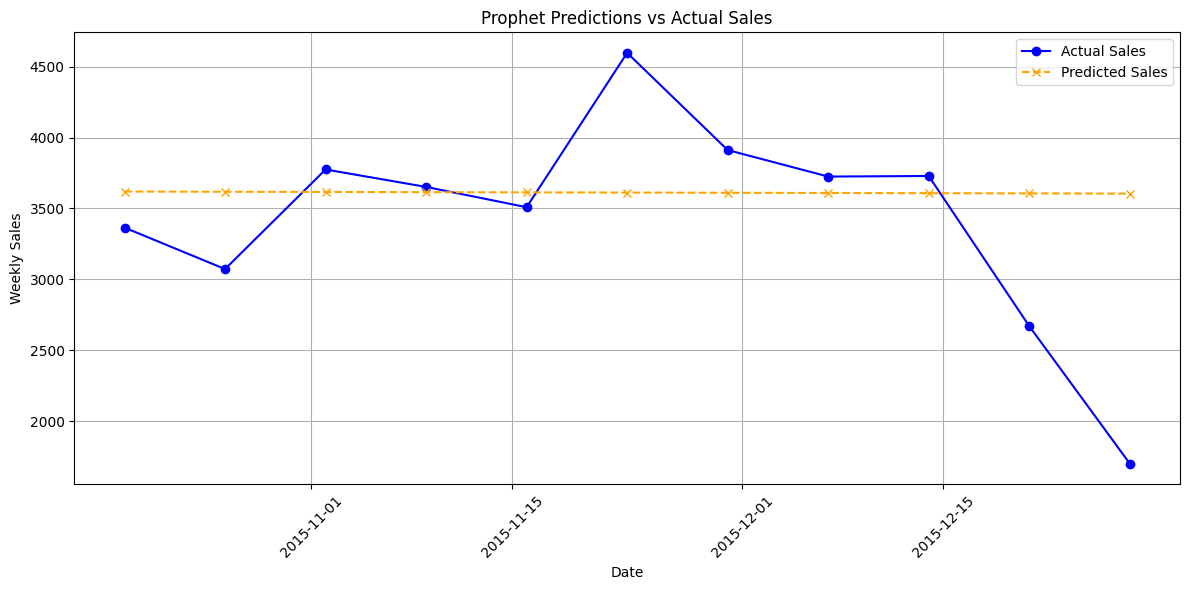

In [22]:
#Prophet (Developed by Facebook)
# Pizza sales by week
def prepare_weekly_sales_for_prophet(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    weekly_sales = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum().reset_index()
    weekly_sales.columns = ['ds', 'y']  # Prophet requires columns 'ds' for date and 'y' for the target variable
    return weekly_sales

pizza_sales_weekly = prepare_weekly_sales_for_prophet(pizza_sales)

# train test split
train_size = int(0.8 * len(pizza_sales_weekly))
train, test = pizza_sales_weekly[:train_size], pizza_sales_weekly[train_size:]

# MAPE
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual))

# Best Prophet Model Training and Output
def best_prophet_model(train, test):
    model = Prophet()
    model.fit(train)
    
    future = model.make_future_dataframe(periods=len(test), freq='W')
    forecast = model.predict(future)
    predictions = forecast['yhat'][-len(test):].values
    prophet_mape = mape(test['y'].values, predictions)
    
    print(f"Best Prophet Model MAPE: {prophet_mape:.4f}")
    return predictions, prophet_mape

# Train and evaluate the Prophet model
prophet_predictions, prophet_mape_score = best_prophet_model(train, test)

# Formating the predictions for display
prophet_predictions = pd.Series(prophet_predictions, index=test['ds'])

print("Predictions:")
print(prophet_predictions)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label='Actual Sales', color='blue', marker='o')
plt.plot(prophet_predictions.index, prophet_predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('Prophet Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Best Regression Model MAPE: 0.1911
Predictions:
order_date
2015-10-19    3545.287304
2015-10-26    3530.562085
2015-11-02    3552.361183
2015-11-09    3537.635964
2015-11-16    3522.910745
2015-11-23    3508.185526
2015-11-30    3493.460307
2015-12-07    3515.259404
2015-12-14    3500.534185
2015-12-21    3485.808966
2015-12-28    3471.083747
dtype: float64


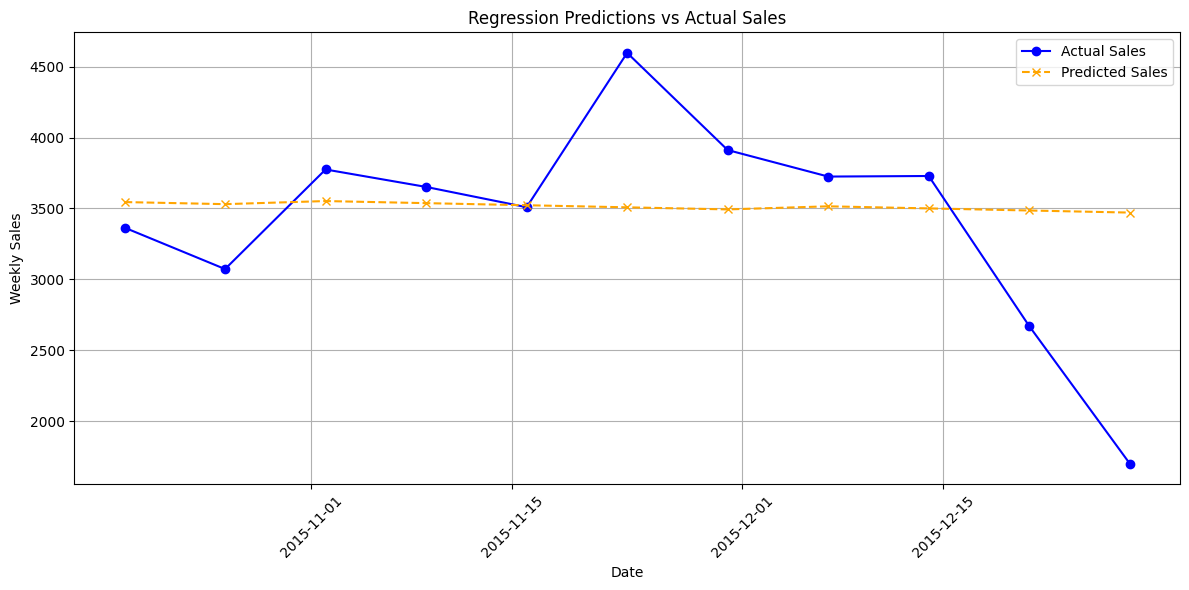

In [23]:
#Regression model
# Pizza sales by week
def prepare_weekly_sales(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    weekly_sales = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum().reset_index()
    return weekly_sales

# Feature Engineering for Regression
def create_regression_features(df):
    df['week_of_year'] = df['order_date'].dt.isocalendar().week
    df['day_of_week'] = df['order_date'].dt.dayofweek
    df['month'] = df['order_date'].dt.month
    df['year'] = df['order_date'].dt.year
    return df

pizza_sales_weekly = prepare_weekly_sales(pizza_sales)
pizza_sales_weekly = create_regression_features(pizza_sales_weekly)

# train test split
train_size = int(0.8 * len(pizza_sales_weekly))
train, test = pizza_sales_weekly[:train_size], pizza_sales_weekly[train_size:]

# Prepareing data for Regression
X_train = train[['week_of_year', 'day_of_week', 'month', 'year']]
y_train = train['quantity']
X_test = test[['week_of_year', 'day_of_week', 'month', 'year']]
y_test = test['quantity']

# Best Regression Model Training and Output
def best_regression_model(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    regression_mape = mape(y_test, predictions)
    
    print(f"Best Regression Model MAPE: {regression_mape:.4f}")
    return predictions, regression_mape

# Train and evaluate the Regression model
regression_predictions, regression_mape_score = best_regression_model(X_train, y_train, X_test, y_test)

# Formating the predictions for display
regression_predictions = pd.Series(regression_predictions, index=test['order_date'])

print("Predictions:")
print(regression_predictions)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test['order_date'], y_test, label='Actual Sales', color='blue', marker='o')
plt.plot(regression_predictions.index, regression_predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('Regression Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
Best LSTM Model MAPE: 0.2301
Predictions:
order_date
2015-11-09    3428.734131
2015-11-16    3477.241699
2015-11-23    3609.132080
2015-11-30    3723.976318
2015-12-07    3809.975586
2015-12-14    3936.232666
2015-12-21    3697.559570
2015-12-28    3479.830322
dtype: float32


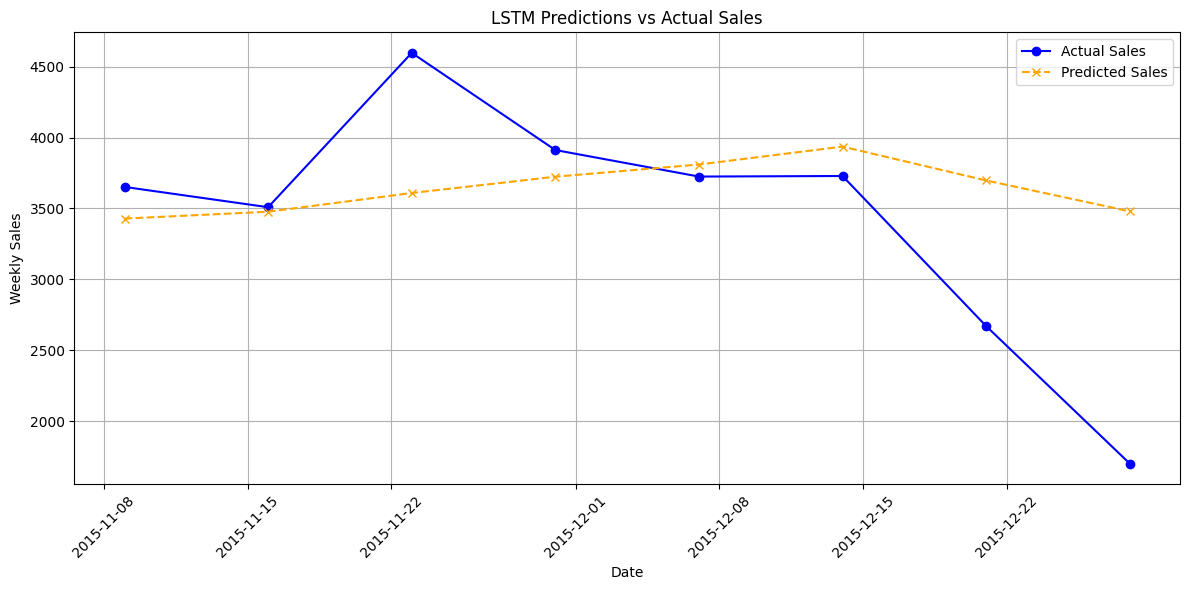

In [24]:
# Pizza sales by week
def prepare_weekly_sales(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    weekly_sales = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum().reset_index()
    return weekly_sales

pizza_sales_weekly = prepare_weekly_sales(pizza_sales)

# train test split
train_size = int(0.8 * len(pizza_sales_weekly))
train, test = pizza_sales_weekly[:train_size], pizza_sales_weekly[train_size:]

# Normalizeing the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['quantity']])
test_scaled = scaler.transform(test[['quantity']])

# Prepareing data for LSTM
def create_lstm_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 3
X_train, y_train = create_lstm_dataset(train_scaled, time_steps)
X_test, y_test = create_lstm_dataset(test_scaled, time_steps)

# Reshapeing X for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Training LSTM Model
def best_lstm_model(X_train, y_train, X_test, y_test, epochs=50, batch_size=32):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    lstm_mape = mape(y_test_rescaled, predictions)
    
    print(f"Best LSTM Model MAPE: {lstm_mape:.4f}")
    return predictions, lstm_mape, y_test_rescaled

# Train and evaluate the LSTM model
lstm_predictions, lstm_mape_score, y_test_rescaled = best_lstm_model(X_train, y_train, X_test, y_test)

# Formating the predictions for display
lstm_predictions = pd.Series(lstm_predictions.flatten(), index=test['order_date'][time_steps:])

print("Predictions:")
print(lstm_predictions)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test['order_date'][time_steps:], y_test_rescaled, label='Actual Sales', color='blue', marker='o')
plt.plot(lstm_predictions.index, lstm_predictions, label='Predicted Sales', color='orange', linestyle='--', marker='x')
plt.title('LSTM Predictions vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [25]:
#ARIMA Model Forecast sales for week
# ARIMA Model forecasted sales for the week:

# Aggregate pizza sales by week and pizza type
def prepare_weekly_sales_by_pizza(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['week'] = df['order_date'].dt.to_period('W').apply(lambda r: r.start_time)
    weekly_sales_by_pizza = df.groupby(['week', 'pizza_name_id'])['quantity'].sum().reset_index()
    weekly_sales_by_pizza.set_index('week', inplace=True)
    return weekly_sales_by_pizza

pizza_sales_weekly_by_pizza = prepare_weekly_sales_by_pizza(pizza_sales)

# Function to forecast sales for each pizza type using ARIMA
def forecast_sales_per_pizza_type_arima(pizza_type, train, periods=1):
    model = ARIMA(train, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecasting for the next week
    forecast = model_fit.forecast(steps=periods)
    return pizza_type, forecast.tolist()

# Forecasting next week's sales for each pizza type using ARIMA
def forecast_next_week_sales_by_pizza_type_arima(pizza_sales_weekly_by_pizza, periods=1):
    pizza_type_forecasts = {}

    # Total sales per pizza type
    total_units_sold = pizza_sales_weekly_by_pizza.groupby('pizza_name_id')['quantity'].sum()

    # Last week in the dataset
    last_week = pizza_sales_weekly_by_pizza.index.max()
    next_week_start = last_week + pd.Timedelta(weeks=1)
    next_week_end = next_week_start + pd.Timedelta(days=6)

    # Looping through each pizza type
    for pizza_type in pizza_sales_weekly_by_pizza['pizza_name_id'].unique():
        pizza_type_data = pizza_sales_weekly_by_pizza[pizza_sales_weekly_by_pizza['pizza_name_id'] == pizza_type]

        # train test split
        train_size = int(0.8 * len(pizza_type_data))
        train = pizza_type_data[:train_size]['quantity']

        # Forecast sales using ARIMA
        pizza_type, forecast = forecast_sales_per_pizza_type_arima(pizza_type, train, periods)

        if forecast is not None:
            pizza_type_forecasts[pizza_type] = forecast
        else:
            print(f"Forecast failed for pizza type: {pizza_type}")

    return pizza_type_forecasts, total_units_sold, next_week_start, next_week_end

# Forecasting pizza sales for the next week using ARIMA
next_week_pizza_sales_forecasts_arima, total_units_sold, next_week_start, next_week_end = forecast_next_week_sales_by_pizza_type_arima(pizza_sales_weekly_by_pizza, periods=1)

# Displaying the forecasted sales for each pizza type and the total quantity of units sold in the predicted week
print(f"Forecasted sales for the week {next_week_start.date()} to {next_week_end.date()}:")
total_forecasted_quantity = 0

for pizza_type, forecast in next_week_pizza_sales_forecasts_arima.items():
    forecast = int(forecast[0])
    next_week_pizza_sales_forecasts_arima[pizza_type]=forecast
    print(f'{pizza_type}: {forecast} pizzas')
    total_forecasted_quantity += forecast

print(f"Total quantity of units sold in the predicted week: {total_forecasted_quantity} pizzas")

Forecasted sales for the week 2016-01-04 to 2016-01-10:
bbq_ckn_l: 92 pizzas
bbq_ckn_m: 91 pizzas
bbq_ckn_s: 27 pizzas
big_meat_s: 107 pizzas
brie_carre_s: 37 pizzas
calabrese_m: 43 pizzas
calabrese_s: 8 pizzas
cali_ckn_l: 80 pizzas
cali_ckn_m: 81 pizzas
cali_ckn_s: 39 pizzas
ckn_alfredo_l: 14 pizzas
ckn_alfredo_m: 61 pizzas
ckn_alfredo_s: 9 pizzas
ckn_pesto_l: 31 pizzas
ckn_pesto_m: 21 pizzas
ckn_pesto_s: 15 pizzas
classic_dlx_l: 26 pizzas
classic_dlx_m: 72 pizzas
classic_dlx_s: 46 pizzas
five_cheese_l: 56 pizzas
four_cheese_l: 114 pizzas
four_cheese_m: 45 pizzas
green_garden_l: 10 pizzas
green_garden_m: 25 pizzas
green_garden_s: 46 pizzas
hawaiian_l: 50 pizzas
hawaiian_m: 24 pizzas
hawaiian_s: 52 pizzas
ital_cpcllo_l: 55 pizzas
ital_cpcllo_m: 30 pizzas
ital_cpcllo_s: 23 pizzas
ital_supr_l: 52 pizzas
ital_supr_m: 66 pizzas
ital_supr_s: 14 pizzas
ital_veggie_l: 20 pizzas
ital_veggie_m: 36 pizzas
ital_veggie_s: 16 pizzas
mediterraneo_l: 36 pizzas
mediterraneo_m: 23 pizzas
mediterraneo_s

In [26]:
#SARIMA Model forecast sales for week
# SARIMA Model forecasted sales for the week:

# Aggregateing pizza sales by week and pizza type
def prepare_weekly_sales_by_pizza(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['week'] = df['order_date'].dt.to_period('W').apply(lambda r: r.start_time)
    weekly_sales_by_pizza = df.groupby(['week', 'pizza_name_id'])['quantity'].sum().reset_index()
    weekly_sales_by_pizza.set_index('week', inplace=True)
    return weekly_sales_by_pizza

pizza_sales_weekly_by_pizza = prepare_weekly_sales_by_pizza(pizza_sales)

# Function to forecast for each pizza type
def forecast_sales_per_pizza_type(pizza_type, train, periods=1):
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
    model_fit = model.fit(disp=False)
    
    # Forecasting for the next week
    forecast = model_fit.forecast(steps=periods)
    return pizza_type, forecast.tolist()

# Forecasting for each pizza type for the next week
def forecast_next_week_sales_by_pizza_type(pizza_sales_weekly_by_pizza, periods=1):
    pizza_type_forecasts = {}
    total_units_sold = pizza_sales_weekly_by_pizza.groupby('pizza_name_id')['quantity'].sum()

    # Last week in the dataset
    last_week = pizza_sales_weekly_by_pizza.index.max()
    next_week_start = last_week + pd.Timedelta(weeks=1)
    next_week_end = next_week_start + pd.Timedelta(days=6)

    # Looping through each pizza type
    for pizza_type in pizza_sales_weekly_by_pizza['pizza_name_id'].unique():
        pizza_type_data = pizza_sales_weekly_by_pizza[pizza_sales_weekly_by_pizza['pizza_name_id'] == pizza_type]
        
        # train test data
        train_size = int(0.8 * len(pizza_type_data))
        train = pizza_type_data[:train_size]['quantity']
        pizza_type, forecast = forecast_sales_per_pizza_type(pizza_type, train, periods)

        if forecast:
            pizza_type_forecasts[pizza_type] = forecast[0]  # Access the first value of the forecast list

    return pizza_type_forecasts, total_units_sold, next_week_start, next_week_end

# Forecasting pizza sales for the next week
next_week_pizza_sales_forecasts, total_units_sold, next_week_start, next_week_end = forecast_next_week_sales_by_pizza_type(pizza_sales_weekly_by_pizza, periods=1)

# Displaying the forecasted sales for each pizza type and the total quantity of units sold in the predicted week
print(f"Forecasted sales for the week {next_week_start.date()} to {next_week_end.date()}:")

total_forecasted_quantity = 0

for pizza_type, forecast in next_week_pizza_sales_forecasts.items():
    forecast = int(forecast)
    next_week_pizza_sales_forecasts[pizza_type]=forecast
    print(f'{pizza_type}: {forecast} pizzas')
    total_forecasted_quantity += forecast

# Displaying the total quantity of units sold in the predicted week
print(f"Total quantity of units sold in the predicted week: {total_forecasted_quantity} pizzas")

Forecasted sales for the week 2016-01-04 to 2016-01-10:
bbq_ckn_l: 82 pizzas
bbq_ckn_m: 95 pizzas
bbq_ckn_s: 39 pizzas
big_meat_s: 89 pizzas
brie_carre_s: 56 pizzas
calabrese_m: 40 pizzas
calabrese_s: 6 pizzas
cali_ckn_l: 83 pizzas
cali_ckn_m: 56 pizzas
cali_ckn_s: 38 pizzas
ckn_alfredo_l: 9 pizzas
ckn_alfredo_m: 58 pizzas
ckn_alfredo_s: 11 pizzas
ckn_pesto_l: 31 pizzas
ckn_pesto_m: 14 pizzas
ckn_pesto_s: 14 pizzas
classic_dlx_l: 19 pizzas
classic_dlx_m: 72 pizzas
classic_dlx_s: 39 pizzas
five_cheese_l: 55 pizzas
four_cheese_l: 149 pizzas
four_cheese_m: 44 pizzas
green_garden_l: 2 pizzas
green_garden_m: 28 pizzas
green_garden_s: 46 pizzas
hawaiian_l: 48 pizzas
hawaiian_m: 20 pizzas
hawaiian_s: 46 pizzas
ital_cpcllo_l: 60 pizzas
ital_cpcllo_m: 37 pizzas
ital_cpcllo_s: 26 pizzas
ital_supr_l: 61 pizzas
ital_supr_m: 49 pizzas
ital_supr_s: 3 pizzas
ital_veggie_l: 16 pizzas
ital_veggie_m: 25 pizzas
ital_veggie_s: 16 pizzas
mediterraneo_l: 37 pizzas
mediterraneo_m: 29 pizzas
mediterraneo_s: 1

In [27]:
#PROPHET evaluation
# Function to forecast sales for each pizza type using Prophet
def forecast_sales_per_pizza_type_prophet(pizza_type, train, periods=1):
    # Prepare the data for Prophet
    train_prophet = train.reset_index().rename(columns={'week': 'ds', 'quantity': 'y'})
    
    # Fit the Prophet model
    model = Prophet()
    model.fit(train_prophet)

    # Create a DataFrame to hold the future dates
    future = model.make_future_dataframe(periods=periods)
    
    # Forecasting
    forecast = model.predict(future)
    return pizza_type, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(periods)

# Forecasting next week's sales for each pizza type using Prophet
def forecast_next_week_sales_by_pizza_type_prophet(pizza_sales_weekly_by_pizza, periods=7):
    pizza_type_forecasts = {}

    # Last week in the dataset
    last_week = pizza_sales_weekly_by_pizza.index.max()
    next_week_start = last_week + pd.Timedelta(weeks=1)
    next_week_end = next_week_start + pd.Timedelta(days=6)

    # Looping through each pizza type
    for pizza_type in pizza_sales_weekly_by_pizza['pizza_name_id'].unique():
        pizza_type_data = pizza_sales_weekly_by_pizza[pizza_sales_weekly_by_pizza['pizza_name_id'] == pizza_type]

        # Train-test split
        train_size = int(0.8 * len(pizza_type_data))
        train = pizza_type_data[:train_size]

        # Forecast sales using Prophet
        pizza_type, forecast = forecast_sales_per_pizza_type_prophet(pizza_type, train, periods)

        if forecast is not None:
            pizza_type_forecasts[pizza_type] = forecast['yhat'].sum()  # Total forecasted sales for the week
        else:
            print(f"Forecast failed for pizza type: {pizza_type}")

    return pizza_type_forecasts, next_week_start, next_week_end

# Forecasting pizza sales for the next week using Prophet
next_week_pizza_sales_forecasts_prophet, next_week_start, next_week_end = forecast_next_week_sales_by_pizza_type_prophet(pizza_sales_weekly_by_pizza)

# Displaying the forecasted sales for each pizza type and the total quantity of units sold in the predicted week
print(f"Forecasted sales for the week {next_week_start.date()} to {next_week_end.date()}:")
total_forecasted_quantity = sum(next_week_pizza_sales_forecasts_prophet.values())

for pizza_type, forecast in next_week_pizza_sales_forecasts_prophet.items():
    print(f'{pizza_type}: {int(forecast)} pizzas')

print(f"Total quantity of units sold in the predicted week: {int(total_forecasted_quantity)} pizzas")

12:23:45 - cmdstanpy - INFO - Chain [1] start processing
12:23:45 - cmdstanpy - INFO - Chain [1] done processing
12:23:46 - cmdstanpy - INFO - Chain [1] start processing
12:23:46 - cmdstanpy - INFO - Chain [1] done processing
12:23:46 - cmdstanpy - INFO - Chain [1] start processing
12:23:47 - cmdstanpy - INFO - Chain [1] done processing
12:23:47 - cmdstanpy - INFO - Chain [1] start processing
12:23:47 - cmdstanpy - INFO - Chain [1] done processing
12:23:48 - cmdstanpy - INFO - Chain [1] start processing
12:23:48 - cmdstanpy - INFO - Chain [1] done processing
12:23:48 - cmdstanpy - INFO - Chain [1] start processing
12:23:49 - cmdstanpy - INFO - Chain [1] done processing
12:23:49 - cmdstanpy - INFO - Chain [1] start processing
12:23:49 - cmdstanpy - INFO - Chain [1] done processing
12:23:50 - cmdstanpy - INFO - Chain [1] start processing
12:23:50 - cmdstanpy - INFO - Chain [1] done processing
12:23:51 - cmdstanpy - INFO - Chain [1] start processing
12:23:51 - cmdstanpy - INFO - Chain [1]

Forecasted sales for the week 2016-01-04 to 2016-01-10:
bbq_ckn_l: 607 pizzas
bbq_ckn_m: 658 pizzas
bbq_ckn_s: 187 pizzas
big_meat_s: 766 pizzas
brie_carre_s: 275 pizzas
calabrese_m: 309 pizzas
calabrese_s: 55 pizzas
cali_ckn_l: 603 pizzas
cali_ckn_m: 563 pizzas
cali_ckn_s: 279 pizzas
ckn_alfredo_l: 111 pizzas
ckn_alfredo_m: 450 pizzas
ckn_alfredo_s: 70 pizzas
ckn_pesto_l: 218 pizzas
ckn_pesto_m: 165 pizzas
ckn_pesto_s: 149 pizzas
classic_dlx_l: 185 pizzas
classic_dlx_m: 520 pizzas
classic_dlx_s: 323 pizzas
five_cheese_l: 379 pizzas
four_cheese_l: 862 pizzas
four_cheese_m: 304 pizzas
green_garden_l: 77 pizzas
green_garden_m: 166 pizzas
green_garden_s: 362 pizzas
hawaiian_l: 385 pizzas
hawaiian_m: 208 pizzas
hawaiian_s: 366 pizzas
ital_cpcllo_l: 417 pizzas
ital_cpcllo_m: 180 pizzas
ital_cpcllo_s: 153 pizzas
ital_supr_l: 391 pizzas
ital_supr_m: 473 pizzas
ital_supr_s: 105 pizzas
ital_veggie_l: 94 pizzas
ital_veggie_m: 239 pizzas
ital_veggie_s: 98 pizzas
mediterraneo_l: 255 pizzas
mediter

In [28]:
#Model Evaluation
import pandas as pd

# Model results as a dictionary
model_performance = {
    'Model': ['ARIMA', 'SARIMA', 'Prophet', 'Regression', 'LSTM'],
    'MAPE': [0.1902, 0.1849, 0.1962, 0.1911, 0.2354],
}

# Createing a DataFrame
df_performance = pd.DataFrame(model_performance)

# Highlight best and worst models
df_performance['Rank'] = df_performance['MAPE'].rank()
df_performance = df_performance.sort_values('MAPE', ascending=True)
df_performance['Best/Worst'] = df_performance['MAPE'].apply(lambda x: 'Best' if x == df_performance['MAPE'].min() else 'Worst' if x == df_performance['MAPE'].max() else '')

# Display table
df_performance

,Model,MAPE,Rank,Best/Worst
1,SARIMA,0.1849,1.0,Best
0,ARIMA,0.1902,2.0,
3,Regression,0.1911,3.0,
2,Prophet,0.1962,4.0,
4,LSTM,0.2354,5.0,Worst


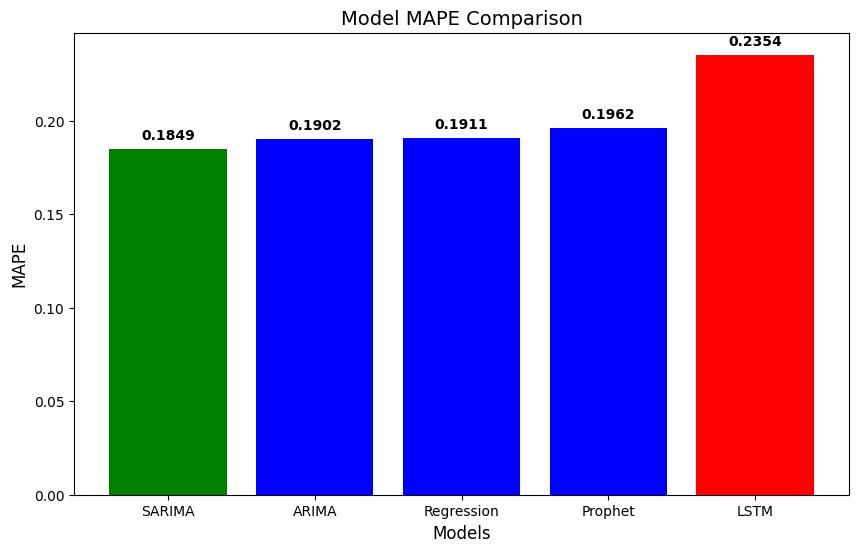

In [29]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['SARIMA', 'ARIMA', 'Regression', 'Prophet', 'LSTM']
mapes = [0.1849, 0.1902, 0.1911, 0.1962, 0.2354]

plt.figure(figsize=(10,6))
plt.bar(models, mapes, color=['green', 'blue', 'blue', 'blue', 'red'])

# Highlighting the best and worst models
plt.title('Model MAPE Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('MAPE', fontsize=12)

for i, v in enumerate(mapes):
    plt.text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold')

plt.show()

In [30]:
print(train.columns)


Index(['order_date', 'quantity'], dtype='object')


In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

# Assuming 'train' is a DataFrame and the time series data is in the 'quantity' column
train_series = pd.to_numeric(train['quantity'], errors='coerce')  # Convert to numeric
train_series = train_series.dropna()  # Drop any NaN values

# Ensure the index is datetime and set frequency if needed
train_series.index = pd.to_datetime(train['order_date'])  # Use 'order_date' for datetime index
train_series = train_series.asfreq('D')  # Adjust frequency as needed (e.g., 'D' for daily)

# Fit the SARIMA model
sarima_model = SARIMAX(train_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)).fit(disp=False)

# Print the model summary
print(sarima_model.summary())


                                     SARIMAX Results                                     
Dep. Variable:                          quantity   No. Observations:                  288
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -293.612
Date:                           Mon, 02 Dec 2024   AIC                            597.224
Time:                                   12:24:48   BIC                            615.398
Sample:                               12-29-2014   HQIC                           604.514
                                    - 10-12-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8784     19.280     -0.046      0.964     -38.666      36.909
ma.L1          0.9949    153.945      0.006

In [32]:
import pickle # Importing pickle for saving the model

# Save the model to a file using pickle
model_filename = 'best_sarima_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(sarima_model, file)
print(f"Model saved as {model_filename}")

Model saved as best_sarima_model.pkl


In [33]:
# Loading the model
model_filename = 'best_sarima_model.pkl'
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Forecasting function
def forecast_sales(loaded_model, periods):
    forecast = loaded_model.predict(n_periods=periods)
    return forecast

forecasted_sales = forecast_sales(loaded_model, periods=7)
print(forecasted_sales)

order_date
2014-12-29       0.000000
2014-12-30    2295.519403
2014-12-31    2283.587165
2015-01-01    2295.132924
2015-01-02    2283.779457
                 ...     
2015-10-08    2767.673822
2015-10-09    2698.350862
2015-10-10    2587.077705
2015-10-11    2518.096727
2015-10-12    3597.686802
Freq: D, Name: predicted_mean, Length: 288, dtype: float64


In [39]:
print(type(train.index))


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


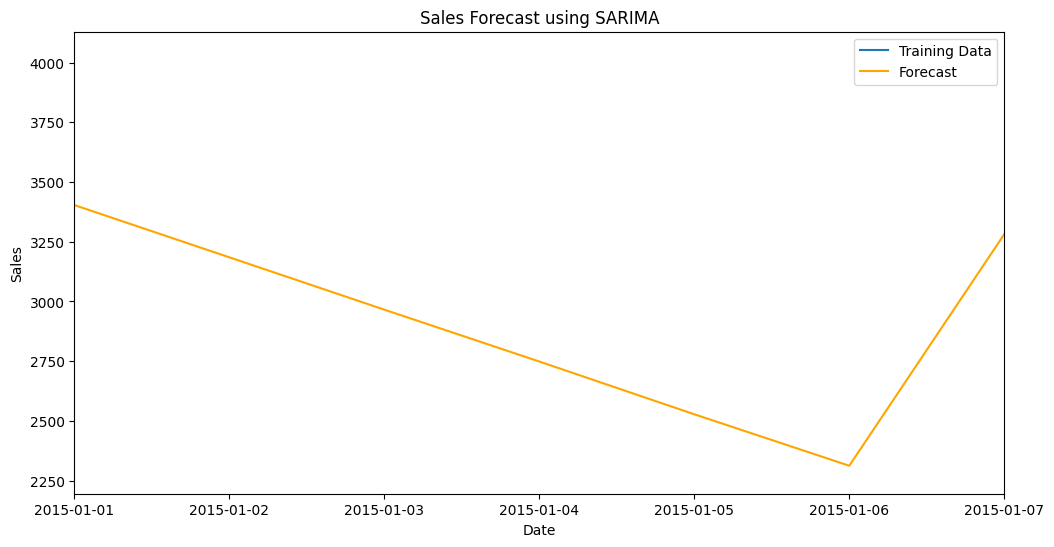

In [65]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Loading the best SARIMA model
with open('best_sarima_model.pkl', 'rb') as file:
    best_model = pickle.load(file)

# Forecasting the next 7 periods (days) using the correct method
n_forecast = 7
forecast = best_model.forecast(steps=n_forecast)  # Using forecast() instead of predict()

# Assuming 'train' is already defined; replace with actual loading code if not.
# Ensure the train index is a DatetimeIndex (if it isn't already)
if not isinstance(train.index, pd.DatetimeIndex):
    train.index = pd.to_datetime(train.index)

# Extract the sales column (assuming it's the second column in train DataFrame)
train_sales = train.iloc[:, 1]  # Adjust this if the sales data is in a different column

# Set the start date for the forecast (e.g., January 1, 2015)
start_date = pd.to_datetime('2015-01-01')

# Create a new date range for the forecasted values starting from the start_date
forecast_dates = pd.date_range(start=start_date, periods=n_forecast)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train.index, train_sales, label='Training Data')

# Plot the forecasted data
plt.plot(forecast_dates, forecast, label='Forecast', color='orange')

# Adding titles and labels
plt.title('Sales Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')

# Set x-axis limits to only show the year 2015
plt.xlim([start_date, forecast_dates[-1]])

# Adding a legend
plt.legend()

# Show the plot
plt.show()


In [68]:
Ingredients_dataset = pd.read_csv("Ingredient_data.csv")
# Displaying the total quantity of predicted ingredients

# Displaying the total quantity of predicted ingredients

# Copy ingredients, map predicted sales, and calculateing the total ingredient quantity
ingredients_predicted = Ingredients_dataset.copy()
ingredients_predicted['predicted_quantity'] = ingredients_predicted['pizza_name_id'].map(next_week_pizza_sales_forecasts_arima)
ingredients_predicted['total_ingredient_qty'] = ingredients_predicted['Items_Qty_In_Grams'] * ingredients_predicted['predicted_quantity']

# Sum of the quantities for each ingredient
ingredient_totals = ingredients_predicted.groupby('pizza_ingredients')['total_ingredient_qty'].sum().to_dict()
print("Total quantity of predicted ingredients for the following week:")
print(ingredient_totals)
ingredients_predicted

Total quantity of predicted ingredients for the following week:
{'?duja Salami': 2540.0, 'Alfredo Sauce': 1285.0, 'Anchovies': 3295.0, 'Artichokes': 10485.0, 'Arugula': 705.0, 'Asiago Cheese': 6200.0, 'Bacon': 28670.0, 'Barbecue Sauce': 2425.0, 'Barbecued Chicken': 6950.0, 'Beef Chuck Roast': 10660.0, 'Blue Cheese': 1680.0, 'Brie Carre Cheese': 1110.0, 'Calabrese Salami': 15100.0, 'Capocollo': 62100.0, 'Caramelized Onions': 592.0, 'Chicken': 80800.0, 'Chipotle Sauce': 7330.0, 'Chorizo Sausage': 5350.0, 'Cilantro': 3665.0, 'Coarse Sicilian Salami': 11480.0, 'Corn': 24540.0, 'Eggplant': 2960.0, 'Feta Cheese': 9970.0, 'Fontina Cheese': 5840.0, 'Friggitello Peppers': 635.0, 'Garlic': 23835.0, 'Genoa Salami': 8790.0, 'Goat Cheese': 12940.0, 'Gorgonzola Piccante Cheese': 5460.0, 'Gouda Cheese': 4410.0, 'Green Olives': 4745.0, 'Green Peppers': 6840.0, 'Italian Sausage': 1070.0, 'Jalapeno Peppers': 5870.0, 'Kalamata Olives': 3070.0, 'Luganega Sausage': 5740.0, 'Mozzarella Cheese': 11560.0, 'Mu

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams,predicted_quantity,total_ingredient_qty
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0,92,3680.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0,92,1380.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0,92,1840.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0,92,2760.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0,92,5520.0
...,...,...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0,33,660.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0,33,660.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0,33,330.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0,33,495.0


In [69]:
ingredient_totals

{'?duja Salami': 2540.0,
 'Alfredo Sauce': 1285.0,
 'Anchovies': 3295.0,
 'Artichokes': 10485.0,
 'Arugula': 705.0,
 'Asiago Cheese': 6200.0,
 'Bacon': 28670.0,
 'Barbecue Sauce': 2425.0,
 'Barbecued Chicken': 6950.0,
 'Beef Chuck Roast': 10660.0,
 'Blue Cheese': 1680.0,
 'Brie Carre Cheese': 1110.0,
 'Calabrese Salami': 15100.0,
 'Capocollo': 62100.0,
 'Caramelized Onions': 592.0,
 'Chicken': 80800.0,
 'Chipotle Sauce': 7330.0,
 'Chorizo Sausage': 5350.0,
 'Cilantro': 3665.0,
 'Coarse Sicilian Salami': 11480.0,
 'Corn': 24540.0,
 'Eggplant': 2960.0,
 'Feta Cheese': 9970.0,
 'Fontina Cheese': 5840.0,
 'Friggitello Peppers': 635.0,
 'Garlic': 23835.0,
 'Genoa Salami': 8790.0,
 'Goat Cheese': 12940.0,
 'Gorgonzola Piccante Cheese': 5460.0,
 'Gouda Cheese': 4410.0,
 'Green Olives': 4745.0,
 'Green Peppers': 6840.0,
 'Italian Sausage': 1070.0,
 'Jalapeno Peppers': 5870.0,
 'Kalamata Olives': 3070.0,
 'Luganega Sausage': 5740.0,
 'Mozzarella Cheese': 11560.0,
 'Mushrooms': 25860.0,
 'Onions

In [74]:
# Saveing the ingredient totals to a DataFrame
ingredient_totals_df = pd.DataFrame(ingredient_totals.items(), columns=['Ingredient', 'Total Quantity (grams)'])
ingredient_totals_df.to_csv('predicted_ingredient_totals.csv', index=False)
print("Predicted ingredient totals saved to 'predicted_ingredient_totals.csv'")

Predicted ingredient totals saved to 'predicted_ingredient_totals.csv'


<Figure size 2500x1500 with 0 Axes>

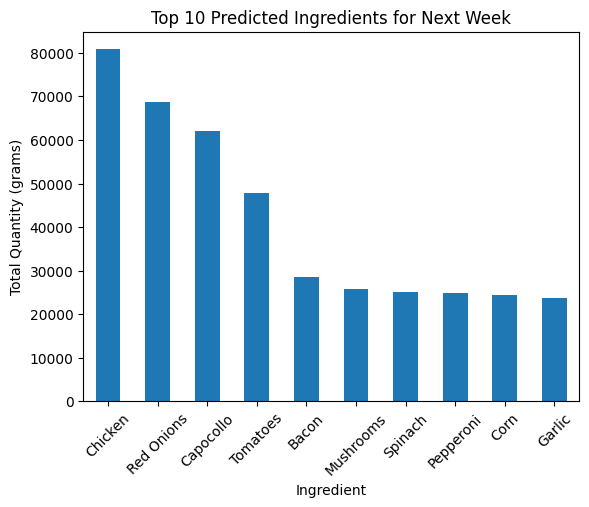

In [75]:
# Visualizing the total quantities of ingredients
plt.figure(figsize=(25, 15))
ingredient_totals_df.nlargest(10, 'Total Quantity (grams)').plot(kind='bar', x='Ingredient', y='Total Quantity (grams)', legend=False)
plt.title('Top 10 Predicted Ingredients for Next Week')
plt.ylabel('Total Quantity (grams)')
plt.xticks(rotation=45)
plt.show()

In [76]:
predicted_ingredient_totals = pd.read_csv('predicted_ingredient_totals.csv')
predicted_ingredient_totals

,Ingredient,Total Quantity (grams)
0,?duja Salami,2540.0
1,Alfredo Sauce,1285.0
2,Anchovies,3295.0
3,Artichokes,10485.0
4,Arugula,705.0
...,...,...
59,Sun-dried Tomatoes,1490.0
60,Thai Sweet Chilli Sauce,4170.0
61,Thyme,185.0
62,Tomatoes,47840.0
